In [1]:
using RecipesBase, Plots, BentTool

ERROR: LoadError: UndefVarError: `@recipe` not defined
Stacktrace:
 [1] top-level scope
   @ :0
 [2] include(mod::Module, _path::String)
   @ Base .\Base.jl:495
 [3] include(x::String)
   @ BentTool c:\Users\CMILLER\.julia\dev\BentTool\src\BentTool.jl:1
 [4] top-level scope
   @ c:\Users\CMILLER\.julia\dev\BentTool\src\BentTool.jl:41
 [5] include
   @ .\Base.jl:495 [inlined]
 [6] include_package_for_output(pkg::Base.PkgId, input::String, depot_path::Vector{String}, dl_load_path::Vector{String}, load_path::Vector{String}, concrete_deps::Vector{Pair{Base.PkgId, UInt128}}, source::String)
   @ Base .\loading.jl:2222
 [7] top-level scope
   @ stdin:3
in expression starting at c:\Users\CMILLER\.julia\dev\BentTool\src\Types\Slab\Slab.jl:76
in expression starting at c:\Users\CMILLER\.julia\dev\BentTool\src\Types\Slab\Slab.jl:76
in expression starting at c:\Users\CMILLER\.julia\dev\BentTool\src\BentTool.jl:1
in expression starting at stdin:3


ErrorException: Failed to precompile BentTool [7ddb071b-2701-46e9-8bde-04280f18bd48] to "C:\\Users\\CMILLER\\.julia\\compiled\\v1.10\\BentTool\\jl_8D6C.tmp".

In [16]:
mutable struct MyType
    a
    b
end

m = MyType(
    [0.0, 40.0, 40.0, 0.0, 0.0],
    [0.0, 0.0, 8.5/12, 8.5/12, 0.0]
)

# @recipe f(::Type{MyType}, m::MyType) = Shape(m.a, m.b)
@recipe function f(m::MyType;)
    linecolor   --> :black
    seriestype  :=  :path
    fillcolor := :lightgrey
    legend := false


    # @series begin
    #     # force an argument with `:=`
    #     seriestype := :path
    #     # ignore series in legend and color cycling
    #     primary := false
    #     linecolor := nothing
    #     fillcolor := :lightgray
    #     fillalpha := 0.5
    #     # ensure no markers are shown for the error band
    #     markershape := :none
    #     # return series data
    #     Shape(m.a, m.b)
    # end
    s = Shape(m.a, m.b)
    translate!(s, 5)
end

In [17]:
using Plots

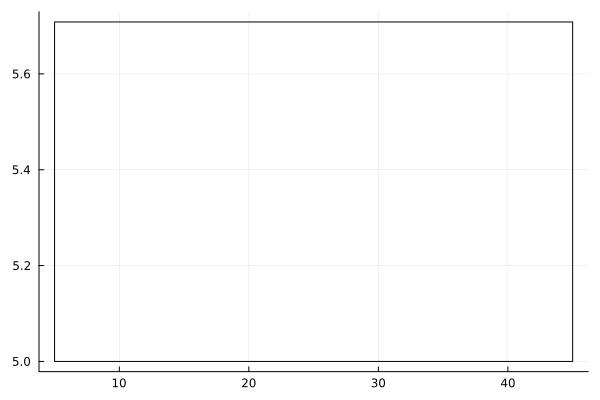

In [18]:
plot(m, c=:lightgrey)

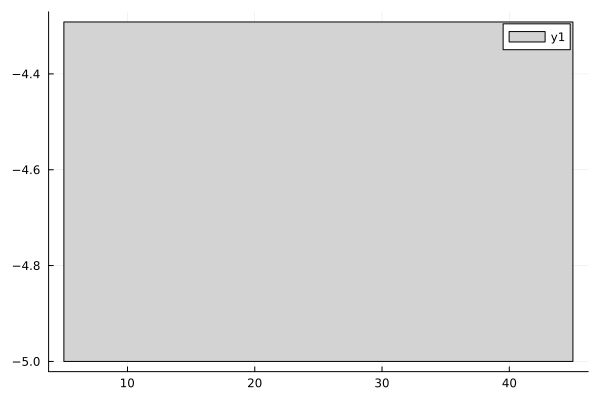

In [3]:
x = [0.0, 40.0, 40.0, 0.0, 0.0]
y = [0.0, 0.0, 8.5/12, 8.5/12, 0.0]
s = Shape(x, y)
translate!(s, 5, -5)
plot(s, c=:lightgrey)

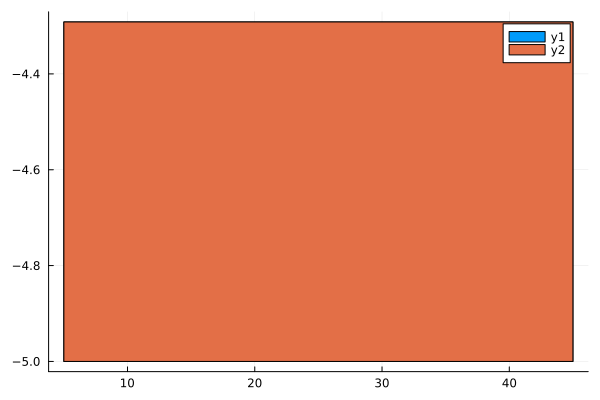

In [38]:
plot(shapes)